In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load dataset
numer_ai = pd.read_csv('../data/numerai_datasets/numerai_training_data.csv')
test = pd.read_csv('../data/numerai_datasets/numerai_tournament_data.csv')

In [3]:
# split into training and validation sets as per the competition instructions
train = numer_ai[numer_ai.validation == 0]
validation = numer_ai[numer_ai.validation == 1]

In [4]:
# size of the datasets
train.shape, validation.shape

((41019, 17), (14019, 17))

## Summary statistics

In [5]:
train.describe()

f1            f2            f3            f4            f5  \
count  4.101900e+04  4.101900e+04  4.101900e+04  4.101900e+04  4.101900e+04   
mean   1.003421e+08  1.012448e+08  1.019261e+08  9.724263e+07  9.899683e+07   
std    1.928475e+07  1.926630e+07  1.976187e+07  1.907210e+07  1.903665e+07   
min    6.544425e+07  6.465174e+07  6.782991e+07  6.448743e+07  6.607797e+07   
25%    8.191512e+07  8.570148e+07  8.394483e+07  8.004811e+07  8.290997e+07   
50%    1.006933e+08  1.026294e+08  1.006677e+08  9.674565e+07  9.842439e+07   
75%    1.175836e+08  1.187595e+08  1.196783e+08  1.140019e+08  1.154201e+08   
max    1.350049e+08  1.339631e+08  1.361839e+08  1.340291e+08  1.339602e+08   

                 f6            f7            f8            f9           f10  \
count  4.101900e+04  4.101900e+04  4.101900e+04  4.101900e+04  4.101900e+04   
mean   9.907522e+07  9.630993e+07  9.913192e+07  1.016804e+08  1.012900e+08   
std    2.020103e+07  1.803059e+07  1.991615e+07  1.967508e+07  2.056339e+07   
min    6.422782e+07  6.426927e+07  6.240757e+07  6.726622e+07  6.704752e+07   
25%    8.329725e+07  8.074061e+07  8.198775e+07  8.572830e+07  8.153442e+07   
50%    1.002703e+08  9.857343e+07  1.003773e+08  1.028253e+08  1.025186e+08   
75%    1.160654e+08  1.112804e+08  1.148990e+08  1.172565e+08  1.199478e+08   
max    1.344819e+08  1.284512e+08  1.321867e+08  1.366481e+08  1.359873e+08   

                f11           f12           f13           f14  validation  \
count  4.101900e+04  4.101900e+04  4.101900e+04  4.101900e+04       41019   
mean   1.027210e+08  9.734094e+07  9.902234e+07  9.900918e+07           0   
std    2.020542e+07  1.773363e+07  1.971734e+07  1.855073e+07           0   
min    6.763343e+07  6.514303e+07  6.424088e+07  6.498516e+07           0   
25%    8.613986e+07  8.322877e+07  8.405056e+07  8.233249e+07           0   
50%    1.038121e+08  9.463436e+07  9.778316e+07  1.004206e+08           0   
75%    1.187840e+08  1.120666e+08  1.155597e+08  1.156055e+08           0   
max    1.379242e+08  1.313358e+08  1.332022e+08  1.320389e+08           0   

             target  
count  41019.000000  
mean       0.505644  
std        0.499974  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

## Pair plot

In [10]:
features = train.columns[:-3]

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


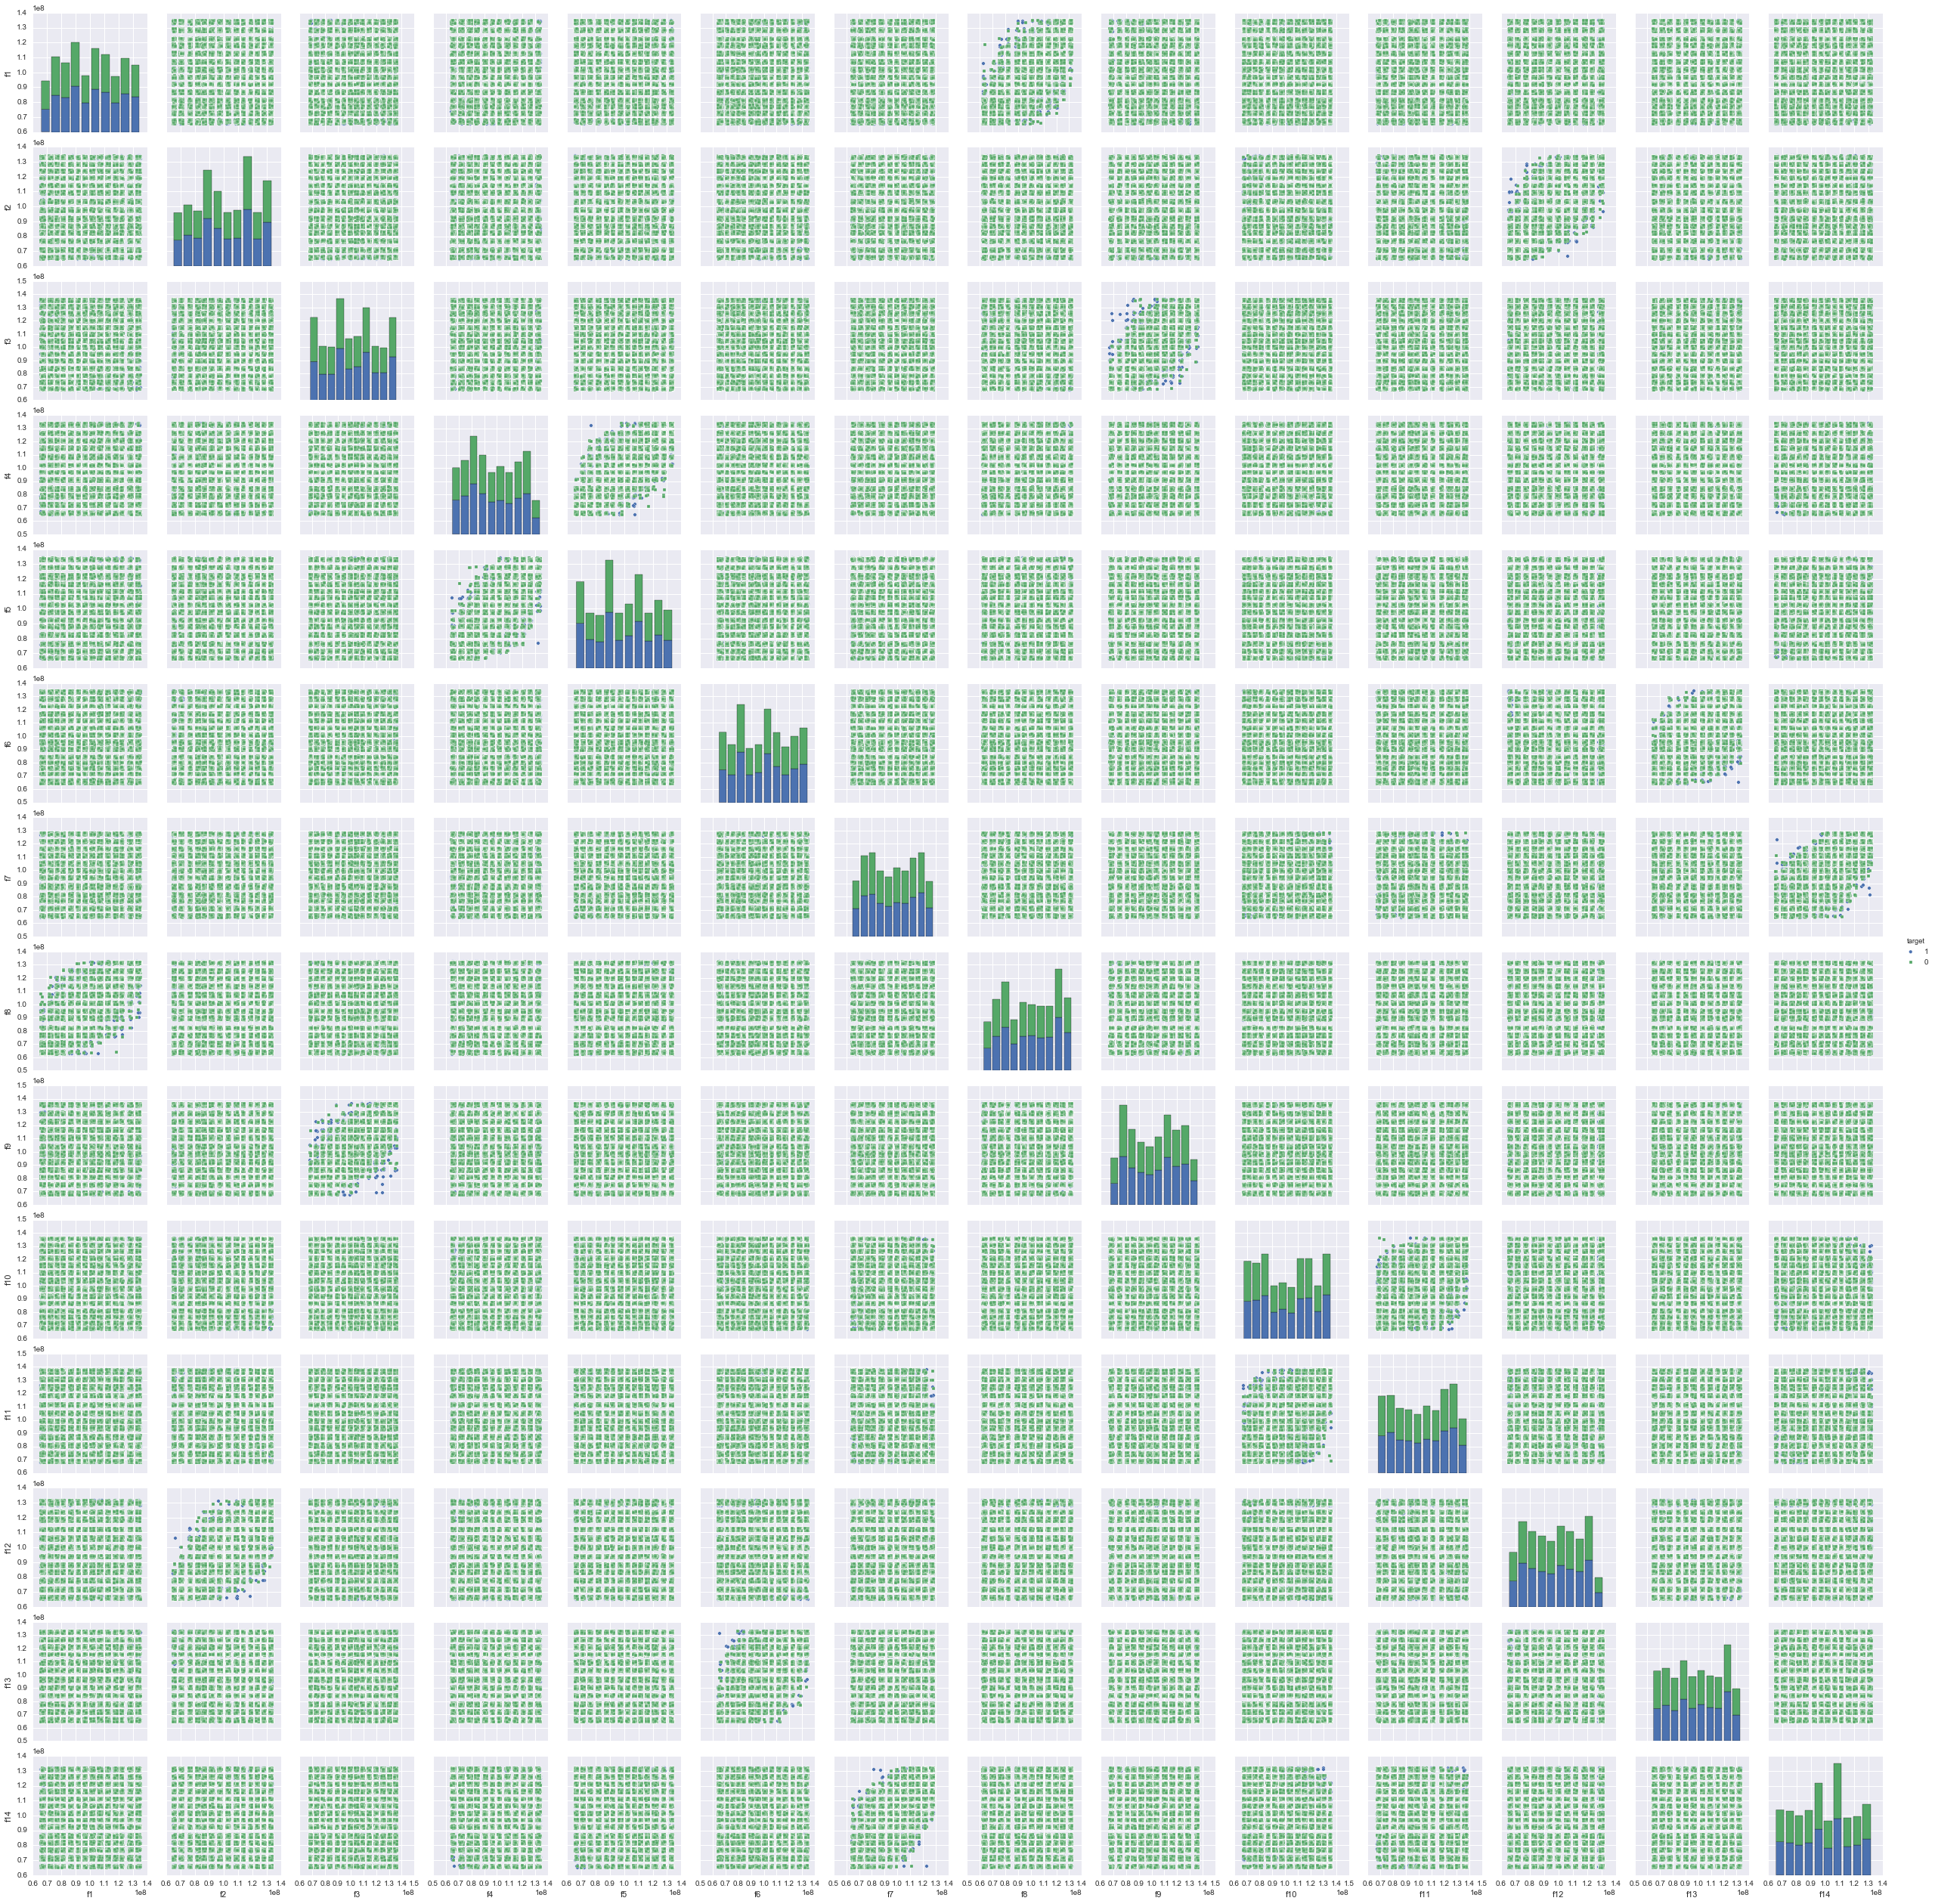

In [11]:
sns.pairplot(train, vars=features, hue='target', markers=['o', 's']);

In [12]:
## correlation matric
train[features].corr()

f1        f2        f3        f4        f5        f6        f7  \
f1   1.000000 -0.159362  0.431513 -0.318912 -0.362903 -0.087203  0.156711   
f2  -0.159362  1.000000 -0.059653  0.201826  0.264995  0.361732 -0.289968   
f3   0.431513 -0.059653  1.000000 -0.182825 -0.204352 -0.128099  0.062666   
f4  -0.318912  0.201826 -0.182825  1.000000  0.876267  0.002152 -0.296187   
f5  -0.362903  0.264995 -0.204352  0.876267  1.000000  0.020731 -0.305114   
f6  -0.087203  0.361732 -0.128099  0.002152  0.020731  1.000000 -0.081651   
f7   0.156711 -0.289968  0.062666 -0.296187 -0.305114 -0.081651  1.000000   
f8   0.882218 -0.121344  0.393596 -0.341502 -0.324062 -0.058864  0.131990   
f9   0.391396 -0.040392  0.900732 -0.205345 -0.186937 -0.109004  0.043514   
f10 -0.160960  0.567202 -0.068782  0.296574  0.358702  0.182729 -0.481849   
f11 -0.146173  0.503619 -0.057699  0.285134  0.296198  0.160405 -0.580586   
f12 -0.138945  0.856406 -0.043923  0.272807  0.241709  0.317979 -0.309735   
f13 -0.070529  0.294690 -0.109182  0.060952  0.006705  0.806242 -0.053443   
f14  0.160960 -0.329641  0.062010 -0.314874 -0.370493 -0.101422  0.820072   

           f8        f9       f10       f11       f12       f13       f14  
f1   0.882218  0.391396 -0.160960 -0.146173 -0.138945 -0.070529  0.160960  
f2  -0.121344 -0.040392  0.567202  0.503619  0.856406  0.294690 -0.329641  
f3   0.393596  0.900732 -0.068782 -0.057699 -0.043923 -0.109182  0.062010  
f4  -0.341502 -0.205345  0.296574  0.285134  0.272807  0.060952 -0.314874  
f5  -0.324062 -0.186937  0.358702  0.296198  0.241709  0.006705 -0.370493  
f6  -0.058864 -0.109004  0.182729  0.160405  0.317979  0.806242 -0.101422  
f7   0.131990  0.043514 -0.481849 -0.580586 -0.309735 -0.053443  0.820072  
f8   1.000000  0.445763 -0.130578 -0.128805 -0.137714 -0.070025  0.150717  
f9   0.445763  1.000000 -0.057209 -0.055048 -0.056901 -0.140764  0.054607  
f10 -0.130578 -0.057209  1.000000  0.820961  0.523165  0.175316 -0.598678  
f11 -0.128805 -0.055048  0.820961  1.000000  0.572360  0.196279 -0.514680  
f12 -0.137714 -0.056901  0.523165  0.572360  1.000000  0.379301 -0.292019  
f13 -0.070025 -0.140764  0.175316  0.196279  0.379301  1.000000 -0.075063  
f14  0.150717  0.054607 -0.598678 -0.514680 -0.292019 -0.075063  1.000000

** Summary **

* (f1, f8), (f2, 12), (f3, f9), (f4, f5), (f6, f13), (f10, f11), (f7, f14) are highly correlated

## Categorical Variable

In [14]:
train.c1.value_counts()

c1_3     7506
c1_14    3790
c1_10    2517
c1_15    2381
c1_8     2380
c1_20    2207
c1_5     1979
c1_23    1781
c1_11    1744
c1_16    1738
c1_24    1659
c1_4     1620
c1_22    1373
c1_21    1266
c1_18    1155
c1_17    1109
c1_19    1084
c1_1      998
c1_7      845
c1_6      822
c1_9      734
c1_12     275
c1_13      56
Name: c1, dtype: int64

In [15]:
train.groupby('c1').count()

f1    f2    f3    f4    f5    f6    f7    f8    f9   f10   f11   f12  \
c1                                                                              
c1_1    998   998   998   998   998   998   998   998   998   998   998   998   
c1_10  2517  2517  2517  2517  2517  2517  2517  2517  2517  2517  2517  2517   
c1_11  1744  1744  1744  1744  1744  1744  1744  1744  1744  1744  1744  1744   
c1_12   275   275   275   275   275   275   275   275   275   275   275   275   
c1_13    56    56    56    56    56    56    56    56    56    56    56    56   
c1_14  3790  3790  3790  3790  3790  3790  3790  3790  3790  3790  3790  3790   
c1_15  2381  2381  2381  2381  2381  2381  2381  2381  2381  2381  2381  2381   
c1_16  1738  1738  1738  1738  1738  1738  1738  1738  1738  1738  1738  1738   
c1_17  1109  1109  1109  1109  1109  1109  1109  1109  1109  1109  1109  1109   
c1_18  1155  1155  1155  1155  1155  1155  1155  1155  1155  1155  1155  1155   
c1_19  1084  1084  1084  1084  1084  1084  1084  1084  1084  1084  1084  1084   
c1_20  2207  2207  2207  2207  2207  2207  2207  2207  2207  2207  2207  2207   
c1_21  1266  1266  1266  1266  1266  1266  1266  1266  1266  1266  1266  1266   
c1_22  1373  1373  1373  1373  1373  1373  1373  1373  1373  1373  1373  1373   
c1_23  1781  1781  1781  1781  1781  1781  1781  1781  1781  1781  1781  1781   
c1_24  1659  1659  1659  1659  1659  1659  1659  1659  1659  1659  1659  1659   
c1_3   7506  7506  7506  7506  7506  7506  7506  7506  7506  7506  7506  7506   
c1_4   1620  1620  1620  1620  1620  1620  1620  1620  1620  1620  1620  1620   
c1_5   1979  1979  1979  1979  1979  1979  1979  1979  1979  1979  1979  1979   
c1_6    822   822   822   822   822   822   822   822   822   822   822   822   
c1_7    845   845   845   845   845   845   845   845   845   845   845   845   
c1_8   2380  2380  2380  2380  2380  2380  2380  2380  2380  2380  2380  2380   
c1_9    734   734   734   734   734   734   734   734   734   734   734   734   

        f13   f14  validation  target  
c1                                     
c1_1    998   998         998     998  
c1_10  2517  2517        2517    2517  
c1_11  1744  1744        1744    1744  
c1_12   275   275         275     275  
c1_13    56    56          56      56  
c1_14  3790  3790        3790    3790  
c1_15  2381  2381        2381    2381  
c1_16  1738  1738        1738    1738  
c1_17  1109  1109        1109    1109  
c1_18  1155  1155        1155    1155  
c1_19  1084  1084        1084    1084  
c1_20  2207  2207        2207    2207  
c1_21  1266  1266        1266    1266  
c1_22  1373  1373        1373    1373  
c1_23  1781  1781        1781    1781  
c1_24  1659  1659        1659    1659  
c1_3   7506  7506        7506    7506  
c1_4   1620  1620        1620    1620  
c1_5   1979  1979        1979    1979  
c1_6    822   822         822     822  
c1_7    845   845         845     845  
c1_8   2380  2380        2380    2380  
c1_9    734   734         734     734

** Some categories prevalent while some are rare **

In [16]:
train.groupby(['c1', 'target']).size()

c1     target
c1_1   0          493
       1          505
c1_10  0         1162
       1         1355
c1_11  0          844
       1          900
c1_12  0          140
       1          135
c1_13  0           32
       1           24
c1_14  0         1875
       1         1915
c1_15  0         1242
       1         1139
c1_16  0          805
       1          933
c1_17  0          585
       1          524
c1_18  0          568
       1          587
c1_19  0          570
       1          514
c1_20  0         1073
       1         1134
c1_21  0          670
       1          596
c1_22  0          636
       1          737
c1_23  0          930
       1          851
c1_24  0          825
       1          834
c1_3   0         3645
       1         3861
c1_4   0          784
       1          836
c1_5   0          967
       1         1012
c1_6   0          424
       1          398
c1_7   0          435
       1          410
c1_8   0         1213
       1         1167
c1_9   0          

** Class distribution is almost equal for all the categories **

## Boxplot

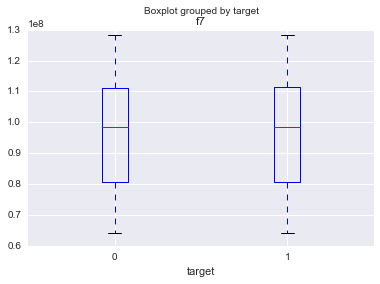

In [27]:
train.boxplot(column='f7', by='target');

## Pivot Table

In [13]:
pd.pivot_table(train, index='c1', columns='target', values='f3')

target          0          1
c1                          
c1_1    104834607  108208884
c1_10   101360736  102679163
c1_11   100647226  102157757
c1_12   102808891  104151457
c1_13   101182106  103401660
c1_14   101737251  102038343
c1_15    97854195  100387021
c1_16   102490651  103776061
c1_17   100817383  101902163
c1_18   101526800  104687641
c1_19    99684113  103521334
c1_20   101501305  103692934
c1_21   100105385  100108023
c1_22   100441590  103095374
c1_23    97733312   99200257
c1_24   102915108  101153456
c1_3    102249985  103292803
c1_4     99704012  102279990
c1_5    102040561  103852347
c1_6     98886183  101711212
c1_7    104371357  102271301
c1_8    102161960  101917243
c1_9    101531796  101409580

In [38]:
negative = train[train.target==0]
positive = train[train.target==1]

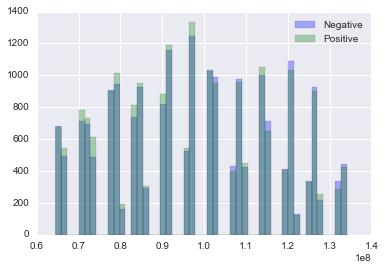

In [42]:
negative.f1.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f1.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

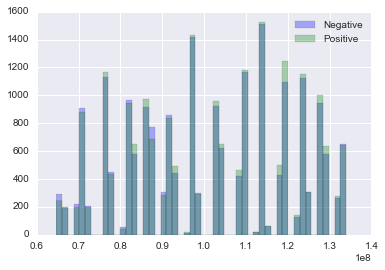

In [43]:
negative.f2.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f2.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

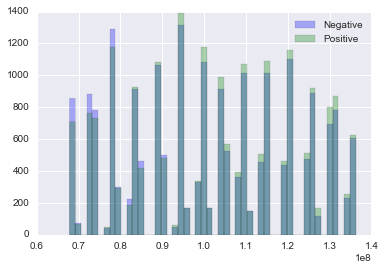

In [44]:
negative.f3.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f3.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

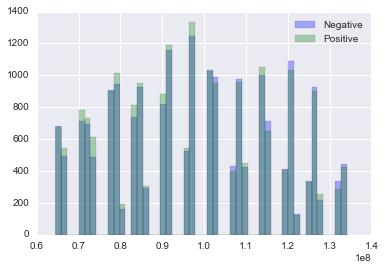

In [45]:
negative.f4.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f4.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

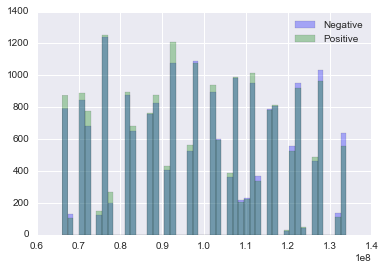

In [46]:
negative.f5.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f5.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

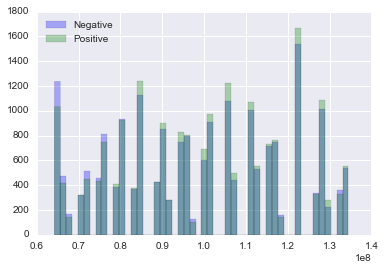

In [47]:
negative.f6.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f6.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');

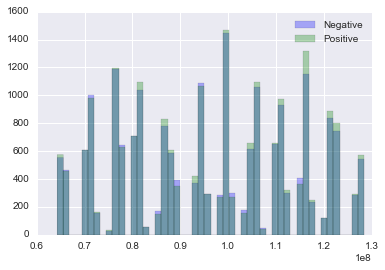

In [48]:
negative.f7.hist(color='b', bins=50, label='Negative', alpha=0.3)
positive.f7.hist(color='g', bins=50, label='Positive', alpha=0.3)
plt.legend(loc='best');